1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.099399124
1.18670023
1.064523698
1.090923077
1.05682853
1.169957361
1.163842452
1.170986602
1.16844844
1.171917796
1.078381894
1.061772725
1.185380277
1.07100243
1.124290331
1.037780094
1.031357957
1.004711232
1.000669266
1.000050531
1.076999594
1.075731369
1.080494049
1.076219676
1.081100326
1.171731781
1
1.005618557
1.158657368
1.057222986
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.09939912 1.18670023 1.0645237  1.09092308 1.05682853 1.16995736
  1.16384245 1.1709866  1.16844844 1.1719178  1.07838189 1.06177272
  1.18538028 1.07100243 1.12429033]
 [1.03778009 1.03135796 1.00471123 1.00066927 1.00005053 1.07699959
  1.07573137 1.08049405 1.07621968 1.08110033 1.17173178 1.
  1.00561856 1.15865737 1.05722299]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


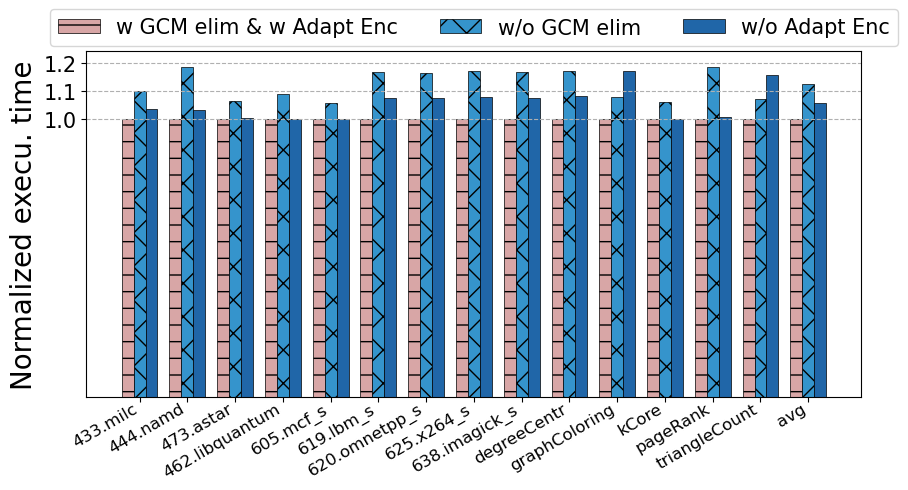

In [23]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl

#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '433.milc','444.namd','473.astar','462.libquantum',
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount','avg'
]
xlabels=''
ylabels='Normalized execu. time'
wb = openpyxl.load_workbook(filename="ablation.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(3, 15)
print(b1)


allfigsize=(10,4.5)     
width=0.25
plt.figure(figsize=allfigsize)
print(b1[0])
plt.bar(x - width*1, b1[0], width, label='w GCM elim & w Adapt Enc', color='#d8a6a6', hatch="-", edgecolor='black', linewidth=0.5) 
plt.bar(x , b1[1], width, label='w/o GCM elim', color='#3594cc', hatch="x", edgecolor='black', linewidth=0.5)
plt.bar(x + width*1, b1[2], width, label='w/o Adapt Enc', color='#2066a8', edgecolor='black', linewidth=0.5)

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, rotation=30,ha='right', va='center_baseline') 
#plt.ylim(0,180000)
plt.yticks([1.0,1.1,1.2],fontsize=15)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=20)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.15), fontsize=15)    
plt.savefig('ablation.pdf',bbox_inches = 'tight')    
plt.show()